In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
traindir='/content/drive/MyDrive/Dataset/Train'

In [ ]:
testdir='/content/drive/MyDrive/Dataset/Test'

# imports

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image

# Model architecture

In [ ]:
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation="sigmoid"))

model.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics=['accuracy'])


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 64)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 110, 110, 64)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                    

In [ ]:
train_datagen=image.ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_dataset=image.ImageDataGenerator(
    rescale=1./255
)


In [ ]:
train_generator=train_datagen.flow_from_directory(
    traindir,
    target_size=(224,224),
    batch_size=32,
    class_mode="binary"
)

Found 274 images belonging to 2 classes.


In [ ]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [ ]:
validation_generator=test_dataset.flow_from_directory(
    testdir,
    target_size=(224,224),
    batch_size=32,
    class_mode="binary"
)

Found 64 images belonging to 2 classes.


In [ ]:
validation_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [ ]:
hist=model.fit_generator(
    train_generator,
    steps_per_epoch=8,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=2
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/10
8/8 [==============================] - 148s 18s/step - loss: 0.7115 - accuracy: 0.5826 - val_loss: 0.6848 - val_accuracy: 0.8594
Epoch 2/10
8/8 [==============================] - 56s 7s/step - loss: 0.5825 - accuracy: 0.7539 - val_loss: 0.4839 - val_accuracy: 0.9062
Epoch 3/10
8/8 [==============================] - 53s 7s/step - loss: 0.3732 - accuracy: 0.8595 - val_loss: 0.2737 - val_accuracy: 0.9531
Epoch 4/10
8/8 [==============================] - 55s 7s/step - loss: 0.3021 - accuracy: 0.8926 - val_loss: 0.2295 - val_accuracy: 0.9688
Epoch 5/10
8/8 [==============================] - 54s 7s/step - loss: 0.2073 - accuracy: 0.9339 - val_loss: 0.1167 - val_accuracy: 0.9688
Epoch 6/10
8/8 [==============================] - 54s 7s/step - loss: 0.1873 - accuracy: 0.9463 - val_loss: 0.1250 - val_accuracy: 0.9844
Epoch 7/10
8/8 [==============================] - 55s 7s/step - loss: 0.1554 - accuracy: 0.9463 - val_loss: 0.1033 - val_accuracy: 0.9688
Epoch 8/10
8/8 [================

In [ ]:
model.save("model_adv.h5")
model.evaluate_generator(train_generator)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  


[0.22635971009731293, 0.9781022071838379]

In [ ]:
model.evaluate_generator(validation_generator)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


[0.21125957369804382, 0.984375]

In [ ]:
model=load_model("model_adv.h5")

import os
y_actual=[]
y_test=[]

for i in os.listdir('/content/drive/MyDrive/Dataset/Test/Normal'):
  img=image.load_img("/content/drive/MyDrive/Dataset/Test/Normal/"+i,target_size=(224,224))
  img=image.img_to_array(img)
  img=np.expand_dims(img,axis=0)
  p = (model.predict(img) > 0.5).astype("int32")
  y_test.append(p[0,0])
  y_actual.append(1)

for i in os.listdir('/content/drive/MyDrive/Dataset/Test/Covid'):
  img=image.load_img("/content/drive/MyDrive/Dataset/Test/Covid/"+i,target_size=(224,224))
  img=image.img_to_array(img)
  img=np.expand_dims(img,axis=0)
  p=model.predict(img)
  y_test.append(p[0,0])
  y_actual.append(0)


In [ ]:
y_actual=np.array(y_actual)
y_test=np.array(y_test)

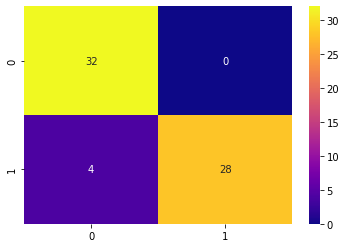

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_actual,y_test)
sns.heatmap(cm,cmap="plasma",annot=True)